In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oMwWp1a5SObWIq3f84aL")
project = rf.workspace("traffic-management-wxhga").project("emergency_dataset")
version = project.version(4)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to emergency_dataset-4 in yolov8:: 100%|██████████| 9962/9962 [00:01<00:00, 6687.57it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO

In [4]:
import ultralytics
print(ultralytics.__version__)

8.3.110


In [5]:
from ultralytics import YOLO

# Load YOLOv8s model
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 328MB/s]


In [6]:
from ultralytics import YOLO

results = model.train(
    data="/content/emergency_dataset-4/data.yaml",
    imgsz=640,
    epochs=40,
    save_period=1,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.0005,
    flipud=0.2,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4
)

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/emergency_dataset-4/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 125MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 264MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1053.9±647.3 MB/s, size: 50.0 KB)


train: Scanning /content/emergency_dataset-4/train/labels... 3486 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3486/3486 [00:02<00:00, 1436.81it/s]


train: New cache created: /content/emergency_dataset-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2984, len(boxes) = 4288. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 922.7±656.3 MB/s, size: 59.6 KB)


val: Scanning /content/emergency_dataset-4/valid/labels... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<00:00, 1040.81it/s]


val: New cache created: /content/emergency_dataset-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      6.66G      1.369      2.127      1.772         44        640: 100%|██████████| 218/218 [00:31<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]

                   all        993       1242      0.461       0.43      0.391      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      7.87G      1.481      2.008      1.857         63        640: 100%|██████████| 218/218 [00:28<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.55it/s]


                   all        993       1242       0.45      0.502      0.355      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      7.93G      1.491      2.012      1.877         37        640: 100%|██████████| 218/218 [00:27<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]


                   all        993       1242      0.554      0.489      0.459      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40         8G      1.447      1.926      1.824         53        640: 100%|██████████| 218/218 [00:27<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.53it/s]


                   all        993       1242       0.61      0.568      0.548      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      8.06G      1.391      1.807       1.78         51        640: 100%|██████████| 218/218 [00:27<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.55it/s]


                   all        993       1242      0.607      0.531      0.501      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      8.13G      1.335      1.691      1.735         42        640: 100%|██████████| 218/218 [00:27<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]


                   all        993       1242      0.566      0.644      0.615      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       8.2G      1.319      1.639      1.716         42        640: 100%|██████████| 218/218 [00:27<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.55it/s]


                   all        993       1242      0.585      0.636      0.632      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      8.27G      1.282      1.576      1.678         38        640: 100%|██████████| 218/218 [00:27<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.58it/s]


                   all        993       1242      0.654      0.744      0.707      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      8.33G      1.255      1.512      1.662         61        640: 100%|██████████| 218/218 [00:27<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.45it/s]


                   all        993       1242      0.672      0.699      0.718      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40       8.4G      1.244      1.495      1.663         40        640: 100%|██████████| 218/218 [00:27<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.55it/s]


                   all        993       1242      0.706      0.757      0.748      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      8.46G      1.204      1.435      1.628         54        640: 100%|██████████| 218/218 [00:27<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]


                   all        993       1242      0.684      0.727      0.734      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      9.02G      1.218      1.413      1.627         40        640: 100%|██████████| 218/218 [00:27<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.61it/s]


                   all        993       1242      0.721      0.699       0.77      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      9.09G      1.202      1.382      1.615         43        640: 100%|██████████| 218/218 [00:27<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.55it/s]


                   all        993       1242      0.792      0.769      0.831      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      9.15G      1.175      1.348      1.596         55        640: 100%|██████████| 218/218 [00:27<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.45it/s]


                   all        993       1242      0.731      0.801      0.801      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      9.22G      1.162      1.322       1.59         56        640: 100%|██████████| 218/218 [00:27<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.56it/s]


                   all        993       1242      0.748      0.784      0.818      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      9.29G      1.157      1.322      1.585         52        640: 100%|██████████| 218/218 [00:27<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.50it/s]


                   all        993       1242      0.831      0.751      0.844      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      9.35G      1.132      1.275      1.566         52        640: 100%|██████████| 218/218 [00:27<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.51it/s]


                   all        993       1242      0.816      0.786      0.866      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      9.42G      1.139      1.244      1.571         58        640: 100%|██████████| 218/218 [00:27<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]

                   all        993       1242      0.811      0.818      0.874      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      9.49G      1.122      1.231      1.564         53        640: 100%|██████████| 218/218 [00:27<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.51it/s]


                   all        993       1242      0.842      0.819      0.882       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      9.55G      1.127        1.2       1.55         44        640: 100%|██████████| 218/218 [00:27<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.53it/s]


                   all        993       1242      0.861      0.807      0.889      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      9.62G      1.096      1.185      1.525         45        640: 100%|██████████| 218/218 [00:27<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.49it/s]


                   all        993       1242      0.869      0.849      0.896       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      9.69G      1.089      1.159      1.528         47        640: 100%|██████████| 218/218 [00:27<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.55it/s]


                   all        993       1242      0.867      0.824      0.897      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      9.75G      1.094      1.158       1.53         53        640: 100%|██████████| 218/218 [00:27<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.45it/s]


                   all        993       1242      0.871      0.838        0.9      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      10.3G      1.078      1.131      1.511         49        640: 100%|██████████| 218/218 [00:27<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.54it/s]


                   all        993       1242      0.851      0.836      0.907      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      10.4G      1.068      1.112      1.511         41        640: 100%|██████████| 218/218 [00:27<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]


                   all        993       1242      0.863      0.846      0.909      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      10.4G      1.071      1.119      1.514         42        640: 100%|██████████| 218/218 [00:27<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.35it/s]

                   all        993       1242      0.884      0.858      0.912      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      10.5G      1.049      1.072      1.491         55        640: 100%|██████████| 218/218 [00:27<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.58it/s]


                   all        993       1242      0.913      0.843       0.92      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      10.6G      1.048      1.062       1.49         47        640: 100%|██████████| 218/218 [00:27<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.46it/s]


                   all        993       1242      0.904      0.832      0.918      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      10.6G      1.047       1.06       1.49         32        640: 100%|██████████| 218/218 [00:27<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.54it/s]

                   all        993       1242      0.864      0.864      0.918      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      10.7G      1.039      1.046       1.48         60        640: 100%|██████████| 218/218 [00:27<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.54it/s]

                   all        993       1242      0.869      0.884      0.925       0.65


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      10.8G      0.825     0.6751      1.445         16        640: 100%|██████████| 218/218 [00:27<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.41it/s]

                   all        993       1242      0.901      0.806      0.914      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      10.8G     0.8003     0.6403      1.426         18        640: 100%|██████████| 218/218 [00:27<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.54it/s]


                   all        993       1242      0.892      0.886      0.927      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      10.9G     0.7985     0.6008      1.417         17        640: 100%|██████████| 218/218 [00:27<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.52it/s]

                   all        993       1242       0.91      0.885      0.931      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40        11G     0.7812     0.5755      1.402         16        640: 100%|██████████| 218/218 [00:27<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.52it/s]


                   all        993       1242       0.91      0.873      0.929      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      11.1G     0.7537     0.5488      1.376         17        640: 100%|██████████| 218/218 [00:27<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.51it/s]


                   all        993       1242      0.908      0.873       0.93      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      11.7G      0.745     0.5349      1.369         18        640: 100%|██████████| 218/218 [00:27<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.49it/s]


                   all        993       1242      0.925      0.853      0.932      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      11.7G     0.7369     0.5059      1.358         14        640: 100%|██████████| 218/218 [00:27<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.54it/s]

                   all        993       1242      0.927       0.88      0.939      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      11.8G     0.7236     0.4893      1.354         18        640: 100%|██████████| 218/218 [00:27<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.56it/s]

                   all        993       1242      0.925      0.876      0.943      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      11.9G     0.7141     0.4751      1.342         16        640: 100%|██████████| 218/218 [00:27<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]


                   all        993       1242      0.929      0.879       0.94      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      11.9G     0.7069     0.4617      1.327         15        640: 100%|██████████| 218/218 [00:27<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.57it/s]


                   all        993       1242       0.92      0.896      0.943      0.715

40 epochs completed in 0.375 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.45it/s]


                   all        993       1242      0.925      0.876      0.943      0.716
          AmbulanceOff        462        568      0.933      0.875      0.928      0.704
           AmbulanceOn         74         74      0.912      0.841      0.956      0.838
         FireEngineOff        266        300      0.947       0.82      0.919      0.593
          FireEngineOn         53         61      0.871      0.918      0.945      0.742
             PoliceCar        186        239      0.961      0.926      0.964      0.703
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


In [7]:
# Evaluate the model after training
metrics = model.val()

print(f"mAP@0.5       : {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95  : {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1585.3±469.1 MB/s, size: 59.0 KB)


val: Scanning /content/emergency_dataset-4/valid/labels.cache... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.55it/s]


                   all        993       1242      0.925      0.876      0.943      0.717
          AmbulanceOff        462        568      0.933      0.875      0.928      0.703
           AmbulanceOn         74         74      0.912      0.841      0.956       0.84
         FireEngineOff        266        300      0.947       0.82      0.919      0.592
          FireEngineOn         53         61      0.871      0.918      0.945      0.744
             PoliceCar        186        239      0.961      0.926      0.965      0.703
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2
mAP@0.5       : 0.9427
mAP@0.5:0.95  : 0.7166
Precision     : 0.9328
Recall        : 0.8750


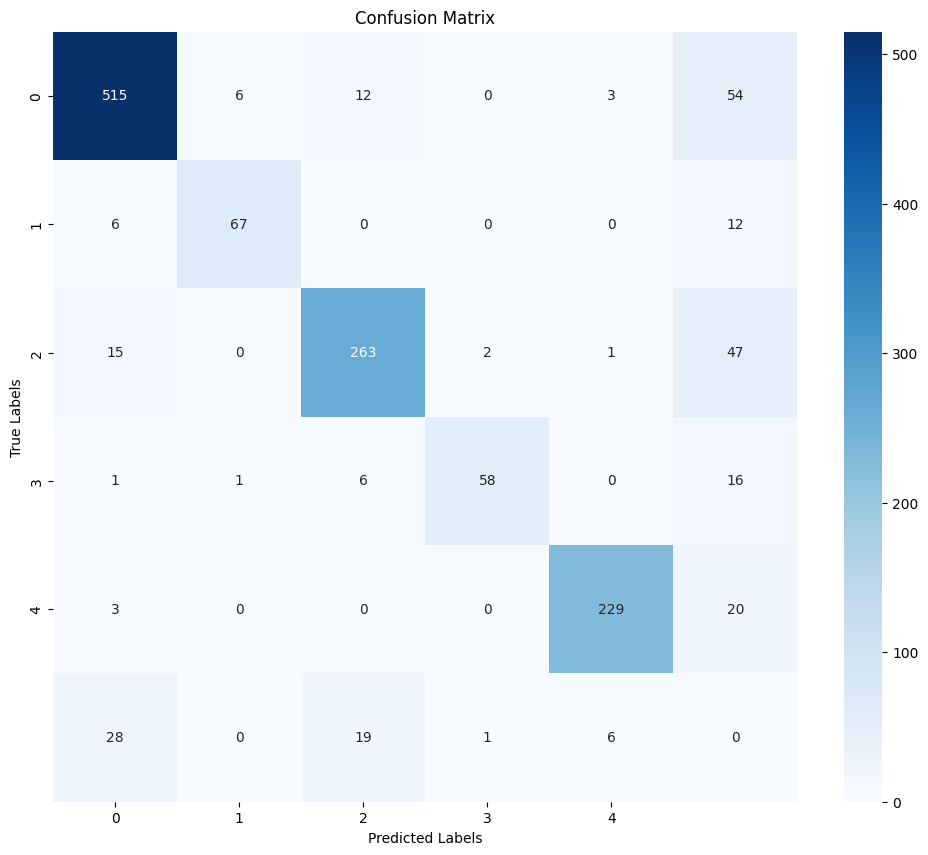

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract confusion matrix
confusion_matrix = metrics.confusion_matrix.matrix
class_names = metrics.names

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   41.8988         1.36892         2.12744         1.77152   
1      2   76.1447         1.48056         2.00769         1.85695   
2      3  109.7420         1.49145         2.01208         1.87668   
3      4  143.2740         1.44667         1.92572         1.82407   
4      5  176.6440         1.39067         1.80708         1.78011   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.46111            0.42978           0.39128   
1               0.44974            0.50212           0.35483   
2               0.55352            0.48895           0.45860   
3               0.60983            0.56830           0.54767   
4               0.60650            0.53137           0.50125   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.17173       1.85418       2.02283       2.60550  0.000369   
1              0.16446       2.00321  

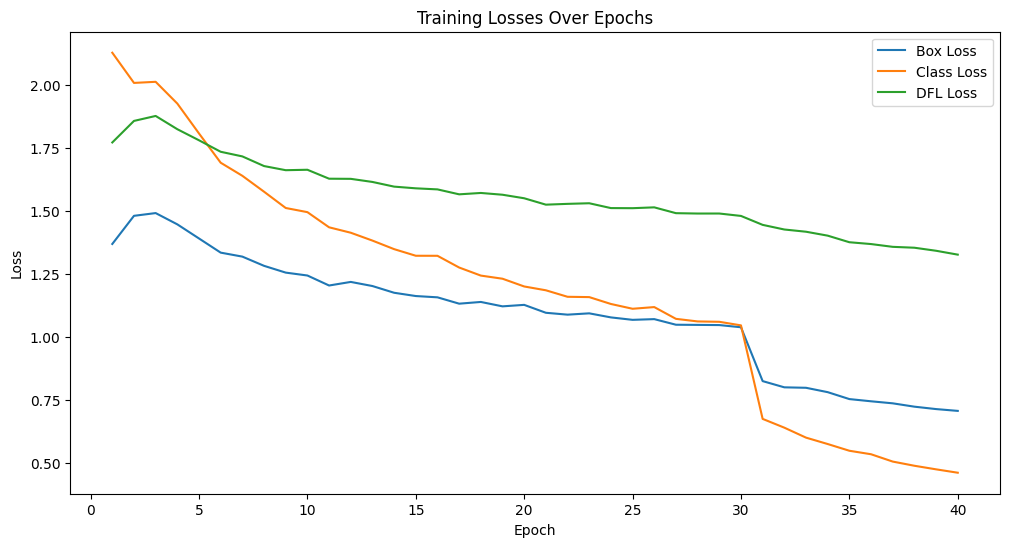

In [10]:
#Detailed Training Metrics

import pandas as pd
results_path = '/content/runs/detect/train/results.csv'
df_results = pd.read_csv(results_path)

print(df_results.head())

plt.figure(figsize=(12, 6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Box Loss')
plt.plot(df_results['epoch'], df_results['train/cls_loss'], label='Class Loss')
plt.plot(df_results['epoch'], df_results['train/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses Over Epochs')
plt.legend()
plt.show()
#Accurately fetches and visualizes logged training metrics.

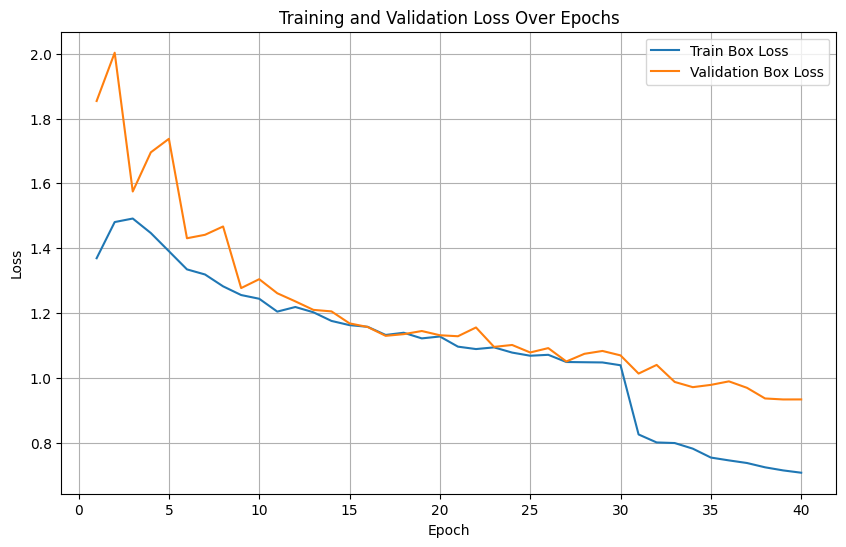

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Train Box Loss')
plt.plot(df_results['epoch'], df_results['val/box_loss'], label='Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

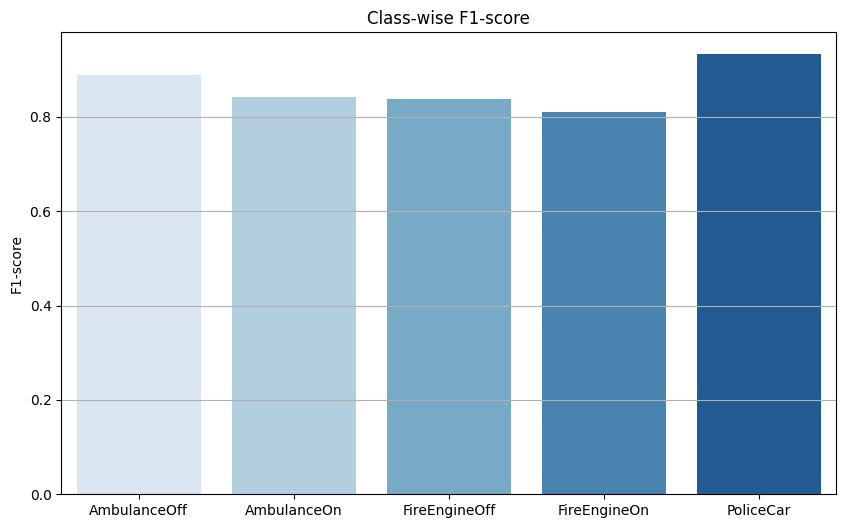

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Confusion matrix from YOLO metrics
cm = metrics.confusion_matrix.matrix

# Manually define your class names (must match your confusion matrix exactly!)
class_names = ['AmbulanceOff', 'AmbulanceOn', 'FireEngineOff', 'FireEngineOn', 'PoliceCar']

# Expand confusion matrix correctly into y_true and y_pred
y_true = []
y_pred = []

for true_label, row in enumerate(cm):
    for pred_label, count in enumerate(row):
        y_true.extend([true_label] * int(count))
        y_pred.extend([pred_label] * int(count))

# Ensure labels match exactly
labels = list(range(len(class_names)))

# Generate the classification report
report = classification_report(y_true, y_pred, labels=labels, target_names=class_names, output_dict=True)

# Extract F1-scores from report
f1_scores = [report[cls]['f1-score'] for cls in class_names]

# Plot F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=f1_scores, palette="Blues")
plt.ylabel('F1-score')
plt.title('Class-wise F1-score')
plt.grid(axis='y')
plt.show()


In [13]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

img_path = '/content/emergency_dataset-4/train/images'

model.predict(source=img_path, save=True)

results = model(img_path)

Streaming output truncated to the last 5000 lines.
image 1988/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.4de7cd24f11f559b5b232aaf2666a777.jpg: 640x640 4 PoliceCars, 10.8ms
image 1989/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.61fad1183e40d06503f6a04a8f9e1435.jpg: 640x640 4 PoliceCars, 10.3ms
image 1990/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.820094567cc7158c73a2de5d290b47c0.jpg: 640x640 (no detections), 10.5ms
image 1991/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.a3eace24d55681cdcf41c158a3841135.jpg: 640x640 (no detections), 10.3ms
image 1992/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.96f3d19e5c215836be055150dd85f6b2.jpg: 640x640 4 AmbulanceOffs, 10.0ms
image 1993/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.c245bc155ccd7a5d6444b2f0fe9489c2.jpg: 640x640 3 AmbulanceOffs, 9.9ms
image 1994/3486 /content/emergency_dataset-4/train/images/PZYKE4UOBE

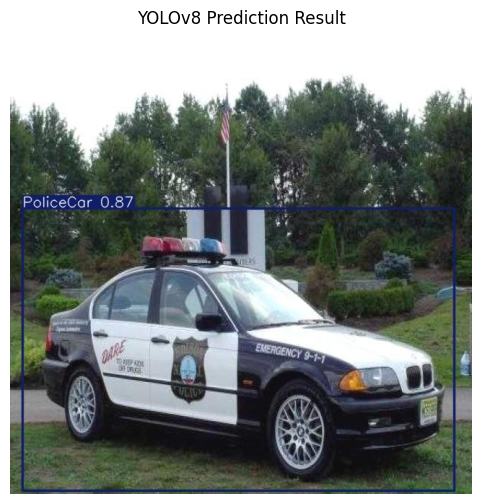

In [19]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import glob

# Define the predicted images folder
predicted_images_path = "/content/runs/detect/predict/"

# Get predicted image from the folder
predicted_images = glob.glob(predicted_images_path + "*.jpg")

if predicted_images:
    image_path = predicted_images[886]

    try:
        img = PILImage.open(image_path)

        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title("YOLOv8 Prediction Result")
        plt.show()

    except Exception as e:
        print(f"Error opening {image_path}: {e}")
else:
    print("No predicted images found in the folder.")

In [20]:
#Final Summary
print("Summary of YOLOv8 Experiment 3")
print("Model Used: YOLOv8m (Medium)")
print(f"Final mAP@0.5: {metrics.box.map50:.4f}")
print(f"Final mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Summary of YOLOv8 Experiment 3
Model Used: YOLOv8m (Medium)
Final mAP@0.5: 0.9427
Final mAP@0.5:0.95: 0.7166
Precision     : 0.9328
Recall        : 0.8750
